<a href="https://colab.research.google.com/github/JoanChege/CHATBOT1/blob/main/ModelFinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction, corpus_bleu

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.text import tokenizer_from_json



In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
with open('/content/dataset3.json') as file:
    data = json.load(file)

In [14]:
lemmatizer = nltk.WordNetLemmatizer()

words, classes, documents = [], [], []

for intent in data['intents']:
    for pattern in intent['patterns']:
        tokenized_words = nltk.word_tokenize(pattern)
        words.extend(tokenized_words)
        documents.append((tokenized_words, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(word) for word in words]
words = sorted(set(words))
classes = sorted(set(classes))

pickle.dump(words, open('words.pkl','wb'))
pickle.dump(classes, open('classes.pkl','wb'))

In [23]:
# Create DataFrame
docs_x = [doc[0] for doc in documents]
docs_y = [doc[1] for doc in documents]

intents_df = pd.DataFrame()
intents_df['Patterns'] = docs_x
intents_df['Tags'] = docs_y

print(intents_df.head())

                 Patterns      Tags
0                    [Hi]  greeting
1                   [Hey]  greeting
2  [Is, anyone, there, ?]  greeting
3             [Hi, there]  greeting
4                 [Hello]  greeting


In [5]:
train_data = []
output_empty = [0] * len(classes)
for document in documents:
    bag = []
    word_patterns = document[0]
    word_patterns = [lemmatizer.lemmatize(word.lower()) for word in word_patterns]
    for word in words:
        if word in word_patterns:
            bag.append(1)
        else:
            bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(document[1])] = 1
    train_data.append([bag, output_row])

In [16]:
# Create DataFrame
X = [data[0] for data in train_data]
y = [data[1] for data in train_data]
df = pd.DataFrame({'Patterns': X, 'Tags': y})

In [17]:
df

,Patterns,Tags
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
5986,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5987,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5988,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5989,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [68]:
# Assuming you have already created the DataFrame
X = df['Patterns'].tolist()
y = df['Tags'].tolist()

# Check the shape of X and y
print("Shape of X:", np.array(X).shape)
print("Shape of y:", np.array(y).shape)

Shape of X: (5991, 14211)
Shape of y: (5991, 318)


In [66]:
# Dataset splitting into train, validate, and test
np.random.shuffle(train_data)
train_index = int(len(train_data) * 0.8)
val_index = int(len(train_data) * 0.9)

train_x = [data[0] for data in train_data[:train_index]]
train_y = [data[1] for data in train_data[:train_index]]

val_x = [data[0] for data in train_data[train_index:val_index]]
val_y = [data[1] for data in train_data[train_index:val_index]]

test_x = [data[0] for data in train_data[val_index:]]
test_y = [data[1] for data in train_data[val_index:]]

In [76]:
# Reshape the data
train_x = np.array(train_x)
train_x = np.reshape(train_x, (train_x.shape[0], 1, -1))
train_y = np.array(train_y)

val_x = np.array(val_x)
val_x = np.reshape(val_x, (val_x.shape[0], 1, -1))
val_y = np.array(val_y)

test_x = np.array(test_x)
test_x = np.reshape(test_x, (test_x.shape[0], 1, -1))
test_y = np.array(test_y)

In [80]:
print("Shape of train_x:", np.array(train_x).shape)
print("Shape of train_y:", np.array(train_y).shape)
print("Shape of val_x:", np.array(val_x).shape)


Shape of train_x: (4792, 1, 14211)
Shape of train_y: (4792, 318)
Shape of val_x: (599, 1, 14211)


In [106]:
# Verify shapes
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of val_x:", val_x.shape)
print("Shape of val_y:", val_y.shape)
print("Shape of test_x:", test_x.shape)
print("Shape of test_y:", test_y.shape)

Shape of train_x: (4792, 1, 14211)
Shape of train_y: (4792, 318)
Shape of val_x: (599, 1, 14211)
Shape of val_y: (599, 318)
Shape of test_x: (600, 1, 14211)
Shape of test_y: (600, 318)


In [81]:
vocab_size = len(words)
max_sequence_length = max([len(x) for x in train_x])
num_classes = len(classes)

In [91]:
from keras.layers import Embedding, Flatten
# Build the model
model = Sequential()
model.add(Flatten())
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(units=64, activation='tanh', kernel_regularizer=l2(0.01), return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=32, activation='tanh', kernel_regularizer=l2(0.01))))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.build(input_shape=(None, max_sequence_length))

In [92]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 1)                 0         
                                                                 
 embedding_11 (Embedding)    (None, 1, 100)            1421100   
                                                                 
 bidirectional_22 (Bidirect  (None, 1, 128)            84480     
 ional)                                                          
                                                                 
 dropout_33 (Dropout)        (None, 1, 128)            0         
                                                                 
 bidirectional_23 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dropout_34 (Dropout)        (None, 64)              

In [93]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
# Training with early stopping callback
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [95]:
model_hist = model.fit(np.array(train_x), np.array(train_y),
          epochs=30,
          batch_size=64,
          validation_data=(val_x, val_y),
          callbacks=[early_stop])

Epoch 1/30
75/75 [==============================] - 147s 2s/step - loss: 5.6669 - accuracy: 0.8057 - val_loss: 2.2777 - val_accuracy: 0.9065
Epoch 2/30
75/75 [==============================] - 125s 2s/step - loss: 1.9138 - accuracy: 0.8915 - val_loss: 1.3138 - val_accuracy: 0.9065
Epoch 3/30
75/75 [==============================] - 125s 2s/step - loss: 1.3853 - accuracy: 0.8915 - val_loss: 1.1152 - val_accuracy: 0.9065
Epoch 4/30
75/75 [==============================] - 121s 2s/step - loss: 1.2267 - accuracy: 0.8915 - val_loss: 1.0542 - val_accuracy: 0.9065
Epoch 5/30
75/75 [==============================] - 124s 2s/step - loss: 1.1484 - accuracy: 0.8915 - val_loss: 1.0168 - val_accuracy: 0.9065
Epoch 6/30
75/75 [==============================] - 123s 2s/step - loss: 1.1272 - accuracy: 0.8915 - val_loss: 0.9872 - val_accuracy: 0.9065
Epoch 7/30
75/75 [==============================] - 123s 2s/step - loss: 1.0581 - accuracy: 0.8915 - val_loss: 0.9783 - val_accuracy: 0.9065
Epoch 8/30
75

In [96]:
model.save("chatbot_model.h5")
print('Done')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done


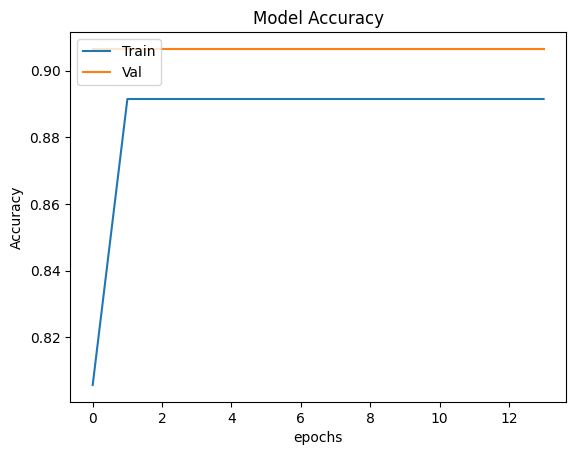

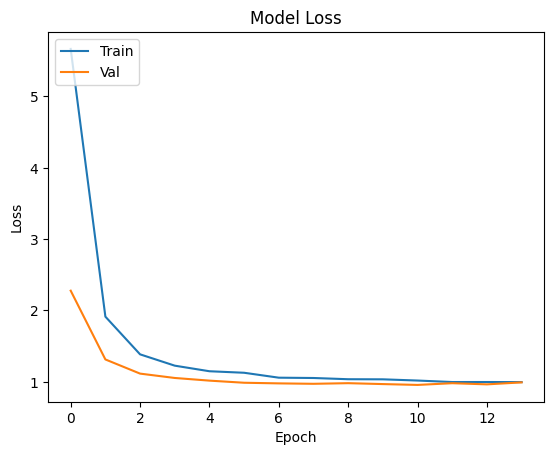

In [97]:
def plot(history):
    #Plot accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epochs')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

plot(model_hist)

In [108]:
# Assuming you have your model already trained
predictions = model.predict(val_x)


# Assuming val_y is a multilabel-indicator array
val_y_single_label = np.argmax(val_y, axis=1)


# Calculate accuracy, precision, and recall
accuracy = accuracy_score(val_y_single_label, predicted_labels)
precision = precision_score(val_y_single_label, predicted_labels, average='weighted')
recall = recall_score(val_y_single_label, predicted_labels, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


19/19 [==============================] - 12s 616ms/step
Accuracy: 0.9065108514190318
Precision: 0.8217619237404579
Recall: 0.9065108514190318


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
